In [14]:
import random
import pandas as pd
import numpy as np
import numpy.matlib
import seaborn as sns
sns.set_style('whitegrid')
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Symmetric Random Walk
首先给出了一个Symmetric Random Walk的概念，假如掷一枚硬币，如果是 Head 则在坐标上的一点X移动 +1 的距离，反之 Tail 的话，则移动 -1 的距离，我们将投掷的结果记为$w_j ,j=1,2,3...$，这样的连续投掷的结果$w = w_1,w_2,w_3...$,在第j次的结果为:$X_{j}= \begin{cases}1, & \text { if } w_{j}=H \\ -1, & \text { if } w_{j}=T\end{cases}$，再定义一个$M_0 = 0$来记录这个点的最初位置，则在k时刻$M_k  = \sum_{j=1}^k X_j,j=1,2,3...$

对于这个Symmetric Random Walk，有一个特点，就是他的增量是相互独立的(independent increments)，即$(M_{k1} - M{k0}),(M_{k2} - M{k1}),...,(M_{k_m} - M{k_{m-1})$这些值都是相互独立的，而这样一个增量$(M_{k_i} - M{k_{i-1})$就是衡量在时间$k_{i-1}$到$k_{i}$之间的位置变化(或者是位置值得变化)。再来看看这个过程的统计特性，由于$\mathbb{E}\left(X_{j}\right)=\frac{1}{2} \times 1+\frac{1}{2} \times(-1)=0$(根据掷硬币的概率来计算)，$\operatorname{var}\left(X_{j}\right)=\mathbb{E}\left(X_{j}^{2}\right)-\left[\mathbb{E}\left(X_{j}\right)\right]^{2}=\mathbb{E}\left(X_{j}^{2}\right)=1$：
$\mathbb{E}\left[M_{k_{i+1}}-M_{k_{i}}\right]=0$
$\operatorname{var}\left(M_{k_{i+1}}-M_{k_{i}}\right)=\sum_{j=k_{i+1}}^{k_{i+1}} \operatorname{var}\left(X_{j}\right)=\sum_{j=k_{i+1}}^{k_{i+1}} 1=k_{i+1}-k_{i}$，可见这样一个位置变化的方差，取决于时间的变化。以下为这个Symmetric Random Walk的模拟：

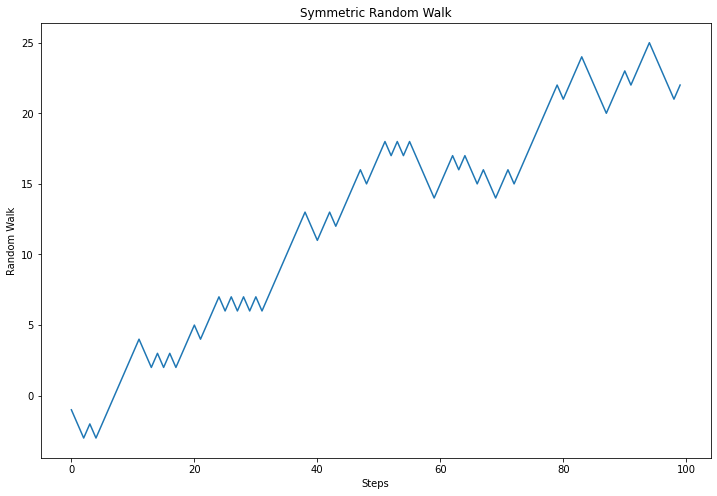

In [6]:
prob = 0.5  ## 硬币朝上或朝下的概率
N = 100 ## 运动的总次数，由于每单位时间掷一次硬币，行动一次，相当于
        ## 每单位时间运动一次
def randomWalk(N):
    positions=np.zeros(N)
    start = 0 ## 起始位置0
    positions[0] = start
    for i in range(N):
        rr = random.randint(0,1) ## 在0和1中随机抽取
        if rr<prob:
            start -= 1
        elif rr>prob:
            start += 1
        positions[i] = start
    return positions
fig = plt.figure(figsize=(12,8))
plt.title("Symmetric Random Walk")
plt.xlabel("Steps")
plt.ylabel("Random Walk")
plt.plot(randomWalk(N))

为了去逼近布朗运动，进一步我们就要对这个最简单的Random Walk进行一定的伸缩，比如我们在单位时间内掷多次硬币同时减小步幅：单位时间内掷100次硬币(对比于之前的一次)，步幅减小为原来的$\frac{1}{10}$, 我们重新定义这个 scaled symmetric random walk:
$W^{(n)}(t)=\frac{1}{\sqrt{n}} M_{n t}$;
其中t为单位时间内掷硬币的次数,t为时间，如果$n \rightarrow \infty$,那么就得到Brownian Motion。同样，这个$W^{(n)}(t)$具有相同的性质

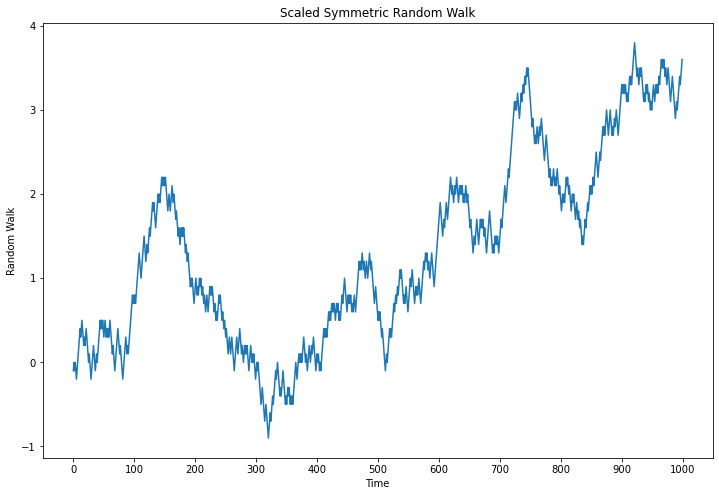

In [7]:
prob = 0.5
N = 100 ## 每单位时间内的投掷次数，同理也是移动的次数
t = 10 ## 共10个单位次数；其实相当于 100 * 10 次运动

def randomWalk(N,t):
    time_step = []
    start = 0 ##
    for i in range(t):
        positions = np.zeros(N)
        for j in range(N):
            rr = random.randint(0,1)
            if rr<prob:
                start -= 1/np.sqrt(100)
            elif rr>prob:
                start += 1/np.sqrt(100)
            positions[j] = start
        time_step.extend(positions)
    return time_step

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
plt.title("Scaled Symmetric Random Walk")
plt.xlabel("Time")
plt.ylabel("Random Walk")
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.plot(randomWalk(N,t))

C:\Users\tianm\AppData\Local\Temp/ipykernel_11744/3729576278.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = step


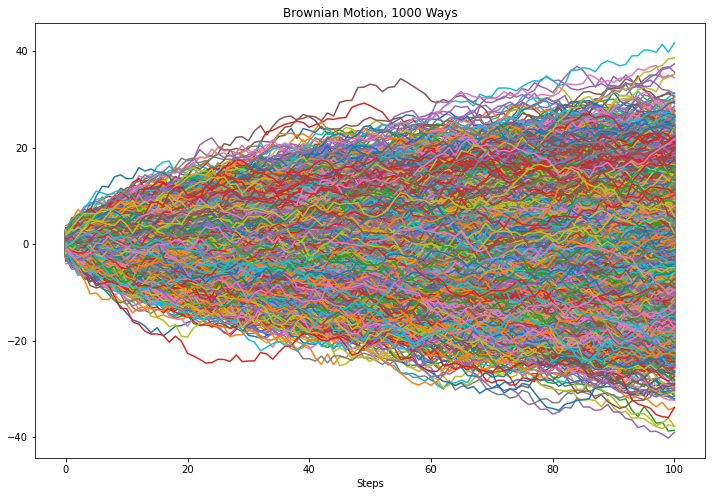

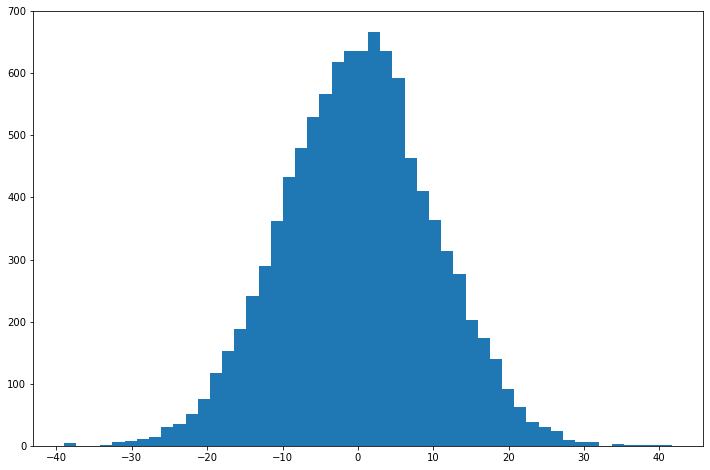

In [5]:
# 浅做一个GBM
### 模拟10000条路径，每条路径100步
num_simulations = 10000
num_ways = 100

simulation_df = pd.DataFrame()
### 先定义在DataFrame中所有路径的起始值
for x in range(num_simulations):
    count = 0
    mean = 0
    std = 1

    step = []
    start = 0
    routine = start + np.random.normal(mean, std) ### 生成标准正态分布的随机数
    step.append(routine)
    ### 给每一条路径累加
    for y in range(num_ways):
        if count == 1001:
            break
        routine = step[count] + np.random.normal(mean, std)
        step.append(routine)
        count += 1

    simulation_df[x] = step
### Plot
fig = plt.figure(figsize=(12,8))
plt.plot(simulation_df)
plt.title("Brownian Motion, 1000 Ways")
plt.xlabel("Steps")
### 把每条路径最后的值生成一个histogram
final_point = simulation_df.iloc[-1,:];
fig = plt.figure(figsize=(12, 8));
plt.hist(final_point, bins = 50);

上一篇关于随机过程的文章最终说到了模拟Brownian Motion。这次首先铺垫几个布朗运动的性质吧:
一个 Scaled Brownian Motion，也可以叫做 Wiener Process -- $W(t)$ 在 $[0, T]$ 上是一个随机 变量，且随时间 $t \in[0, T]$ 变化，要满足下面三个条件:
1. $W(0)=0 \quad$ (with probability $=1$ ) ;
2. 对于 $0 \leq s<t \leq T$ ，布朗运动的一个随机增量 $W(t)-W(s)$ 要满足: $\mathbb{E}[W(t)-W(s)]=0$ 且 $\operatorname{var}(W(t)-W(s))=t-s ;$ 也就是说 $W(t)-W(s) \sim \sqrt{t-s} \mathcal{N}(0,1)$;
3. 对于 $0 \leq s<t<u<v<T$ ，增量 $W(t)-W(s)$ 和 $W(v)-W(u)$ 是相互独立的。
4. (不确定放在这里合不合适)由于 Brownian Motion 连续不可导的性质: 1. $d W_{t} d W_{t}=d t$ ； 2. $d W_{t} d t=0 ; 3 . d t d t=0$.

在上一篇中的随机游走模型时基于郑硬币的 $\frac{1}{2}$ 正反概率(虽然期望也是0)，现在基于上边布朗运动的性质，我们重新直接来建模。假设在一个单位时间内，每一个小的时间段为$d t$且$d t=\frac{T}{N}$ ，
$W_{j}$代表$W\left(t_{j}\right), t_{j}=j d t$ 。根据上边的性质1. $W_{0}=0$ ，
$W_{j}=W_{j-1}+d W_{j}, j=1,2,3, \ldots, N$;

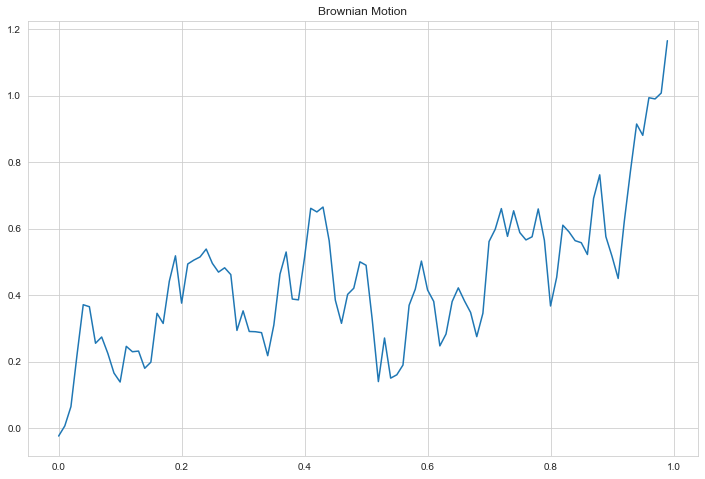

In [11]:
N=100;
dt = 1.0 / N;
t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N); ## randn 产生N个正态分布的随机数
W = np.cumsum(dW); ## 根据上个代码块的最后一行公式可知，将dW累加就能得到W（因为w(0)是等于0的）

fig = plt.figure(figsize=(12,8));
plt.title("Brownian Motion");
plt.plot(t, W);

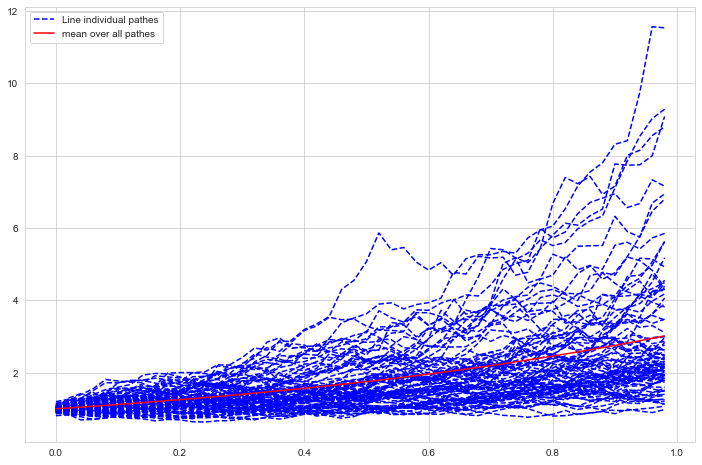

In [15]:
N=50;
M=10000;
dt = 1.0 / N;
t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N,M);
W = np.cumsum(dW,axis=0);
t_  = np.transpose(np.matlib.repmat(t, M, 1)); # np.matlib.repmat:此函数为重复生成M个t矩阵，并加入到t的右边
u=np.exp(t_+ 0.5*W);
u_mean = np.mean(u, axis=1);
fig = plt.figure(figsize=(12,8));
h1 = plt.plot(t, u[:,np.arange(10,100)],'b--', label="Line individual pathes")[1];
h2, = plt.plot(t, u_mean, 'r-', label="mean over all pathes");
plt.legend(handles=[h1,h2]);

进入正题，定义这样的一个几何布朗运动:
$$
d S=\mu S d t+\sigma S d W_{t} ，
$$
其中$S$就是资产价格$\mu$也就是 drift coefficient (过去的收益率的均值)，$\sigma$是diffusion coefficient (价格波动率)。这样一个简单地GBM，也就是对于$\mu$和$\sigma$都是常数，通过积分可得:
$$
S(t)=S_{0} e^{\left(\mu-\frac{1}{2} \sigma^{2}\right)+\sigma W_{t}}
$$
当然，事实上$W_{t}$是不可微的，通过 Itô 积分才得到了以上结果(先挖个坑，这个涉及到EulerMaruayama Method，以后再来补充)。同样我们要看一下在10000条路径模拟后的价格期望:

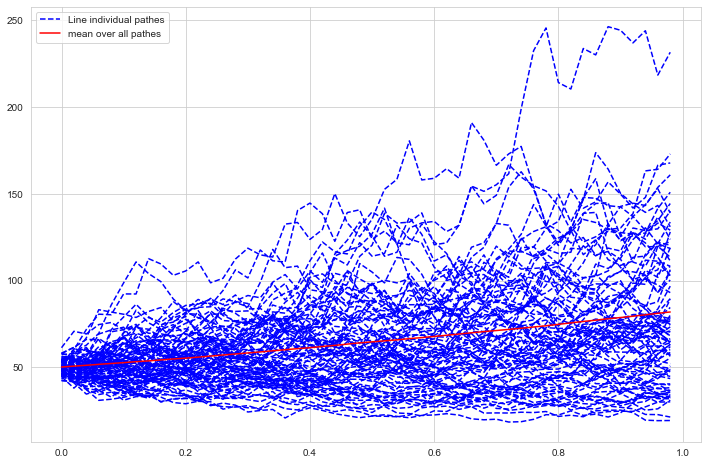

In [16]:
S0 = 50
mu = 0.5
sigma = 0.6

N=50;
M=10000;
dt = 1.0 / N;
t = np.arange(0.0,1.0, dt);
dW = np.sqrt(dt)*randn(N,M);
W = np.cumsum(dW,axis=0);
t_  = np.transpose(numpy.matlib.repmat(t, M, 1));
u = S0 * np.exp(((mu - 0.5*sigma**2)*t_)+(sigma*W));
u_mean = np.mean(u, axis=1);
fig = plt.figure(figsize=(12,8));
h1 = plt.plot(t, u[:,np.arange(10,100)],'b--', label="Line individual pathes")[1];
h2, = plt.plot(t, u_mean, 'r-', label="mean over all pathes");
plt.legend(handles=[h1,h2]);